# Classification Methods
In this lab, it is required to identify between different hand-drawn shapes; such as rectangles,
circles, triangles, ellipses, polygons, etc.
We will start our first lab in this course by understanding the main pipeline of any machine
learning project:

**NOTE** READ ALL CODE AND FILL THE FUNCTIONS IN THE 'Utils' NOTEBOOK AS YOU GO

In [3]:
##### Always make all imports in the first cell of the notebook, run them all once 

import cv2
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
IN_DEBUG=False ## sets DEBUG false to avoid running assertions on incomplete requirements

%run ./utils.ipynb  ## this line runs the utils notebook and imports it into the current notebook

# use interactive plots
%matplotlib notebook
## you will need to re-run this cell every time you change something in the utils notebook
## DONOT forget to save the utils notebook before running this cell

14150.5 16120 23235.21926595011 25933.49853515625


## A ML project is divided into many stages:

### 1. Gathering Data:

The first real step of machine learning is gathering data. This step is
very important because the **quality and quantity** of data that you gather will directly
determine how good your predictive model can be.

In this lab, the data we collect
will be the images of hand-drawn shapes.


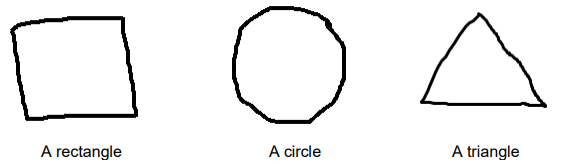

In [5]:
### read all data into lists
## define placeholders to the raw data
raw_data = []
raw_data_rec = []
raw_data_circle = []
raw_data_tri = []

In [6]:
## load rectangle images
for filename in sorted(glob.glob('images/rectangle/*.png')):
    img = cv2.imread(filename) ## cv2.imread reads images in RGB format
    raw_data.append(img)
    raw_data_rec.append(img)

In [7]:
## load circle images
for filename in sorted(glob.glob('images/circle/*.png')):
    img = cv2.imread(filename) 
    raw_data.append(img)
    raw_data_circle.append(img)

In [8]:
## load triangle images
for filename in sorted(glob.glob('images/triangle/*.png')):
    img = cv2.imread(filename)
    raw_data.append(img)
    raw_data_tri.append(img)

### 2. Data Preparation:

The second stage is to convert the raw data into clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. We need to prepare it to be suitable for our problem.

In this lab, we need to convert our RGB images to grayscale (Why?), smooth them to remove noise by applying a Gaussian
filter or a low pass filter (blurring), and applying a threshold on the image pixels.

The pixels having intensity less than this threshold should be considered black pixels, and white otherwise. 

In [9]:
## placeholders for preprocessed data
clean_data = []
clean_data_rec = []
clean_data_circle = []
clean_data_tri = []

In [10]:
for rec_img in raw_data_rec:
    ## TODO: implement the function preprocess() in the utils notebook
    preprocessed_img = preprocess(rec_img)
    clean_data.append(preprocessed_img)
    clean_data_rec.append(preprocessed_img)

In [11]:
for circle_img in raw_data_circle:
    preprocessed_img = preprocess(circle_img)
    clean_data.append(preprocessed_img)
    clean_data_circle.append(preprocessed_img)

In [12]:
for tri_img in raw_data_tri:
    preprocessed_img = preprocess(tri_img)
    clean_data.append(preprocessed_img)
    clean_data_tri.append(preprocessed_img)

### 3. Feature Extraction: 

Now that we have clean data, we can use it to solve our classification problem.

This step could be either:
    
**A. Feature Engineering:** transformation of raw data into features suitable for
modeling.

**B. Feature Transformation:** transformation of data to improve the accuracy of
the algorithm.

**C. Feature Selection:** removing unnecessary features.
    
The process of feature extraction in our problem can have many designs:

* One design is to extract the number of black pixels compared to the number
white pixels in each image and use this feature to differentiate between different
shapes. (Is this a powerful feature?) Can you think of other features?


* We will extract features by computing the convex hull of these shapes, and
compare this convex hull with the minimum enclosing circle, minimum
enclosing rectangle and minimum enclosing triangle bounding that figure.

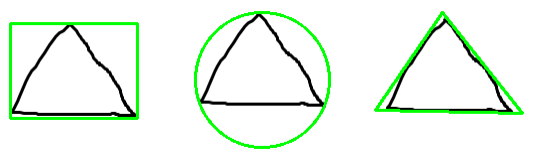

In the example above, the ratio between the areas of the convex hull (figure) to the
area of the bounding triangle will be maximum, and relatively smaller for the
bounding rectangle and circle respectively. On the other hand, if the given
shape was a circle, then the ratio between the areas of the shape to the
bounding circle will be maximum and smaller for the bounding rectangle and
triangle. 

Therefore, each image will be represented with a feature vector in threedimensions (x, y and z) where each component represents the ratio between the
area of the figure to the area of the bounding rectangle, circle and triangle
respectively.

The images in the example above can be represented as a feature vector (0.67, 0.58, 0.92)



In [13]:
## define placeholders for the extracted features: these are the training data we will use to feed our classification models
training_data = []
training_data_rec = []
training_data_circle = []
training_data_tri = []

In [14]:
for rec_img in clean_data_rec:
    ## [2] TODO: implement the function extract_features() and its child functions in the utils notebook
    img_features = extract_features(rec_img, class_number=1)
    training_data.append(img_features)
    training_data_rec.append(img_features)

In [15]:
for circle_img in clean_data_circle:
    img_features  = extract_features(circle_img, class_number=2)
    training_data.append(img_features)
    training_data_circle.append(img_features)

In [16]:
for tri_img in clean_data_tri:
    img_features = extract_features(tri_img, class_number=3)
    training_data.append( img_features)
    training_data_tri.append(img_features)

In [17]:
## Remember: when it comes to actual machine learning algorithms, it is better to work with NumPy arrays
## convert the training data to NumPy arrays
training_data = np.asarray(training_data)
training_data_rec = np.asarray(training_data_rec)
training_data_circle = np.asarray(training_data_circle)
training_data_tri = np.asarray(training_data_tri)

### Visualize the Features
A very useful step here is to visualize your features, see how they separate different classes from one another, and how they group data points from the same class closer together.

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
## [3] TODO: implement the function plot() in utils notebook
plot(training_data_rec[:, 1], training_data_rec[:, 2], training_data_rec[:, 3], title='Training Data',
           xlabel='Feature Rec.', ylabel='Feature Circle', zlabel='Feature Tri.', color_style_str='r',
           label_str="Rectangle",
           figure=fig, axis=ax)

plot(training_data_circle[:, 1], training_data_circle[:, 2], training_data_circle[:, 3], title='Training Data',
           xlabel='Feature Rec.', ylabel='Feature Circle', zlabel='Feature Tri.', color_style_str='b',
           label_str="Circle",
           figure=fig, axis=ax)

plot(training_data_tri[:, 1], training_data_tri[:, 2], training_data_tri[:, 3], title='Training Data',
           xlabel='Feature Rec.', ylabel='Feature Circle', zlabel='Feature Tri.', color_style_str='g',
           label_str="Triangle",
           figure=fig, axis=ax)

plt.show()

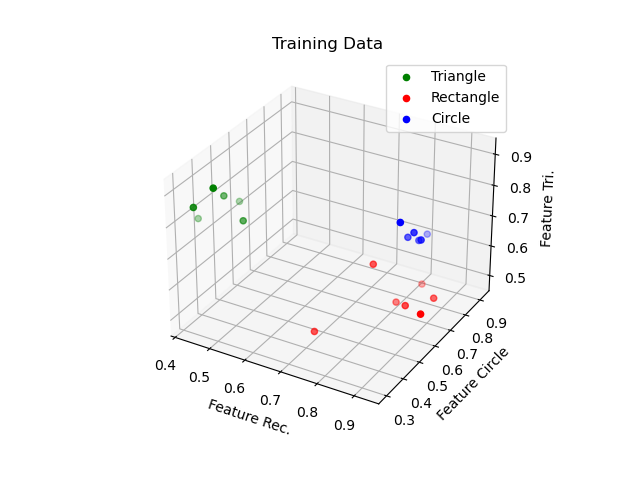

### 4. Model Selection: 
It’s time to feed the crafted features to the classification algorithm that is going to classify or predict the class of unknown or newly unseen data (called testing data). The process of choosing which classification algorithm will yield the best results is not an easy one. It is often subject to many iterations of tuning parameters and features.

In this lab, we will apply three classification algorithms and compare their results:
1. Minimum Distance Classifier.
2. Nearest Neighbour Classifier.
3. K-Nearest Neighbour Classifier.


In [19]:
### [4] TODO: implement the three models in the utils notebook

In [20]:
### Run this after implementing the model functions

true_values = [3, 1, 1, 3, 3, 1, 1, 2, 3, 2]

min_distance_predictions = []
nn_predictions = []
knn_predictions = []
index = 0
for filename in sorted(glob.glob('test/*.png')):
    # Read each image in the test directory, preprocess it and extract its features.
    img_original = cv2.imread(filename)
    img = preprocess(img_original)
    test_point = extract_features(img)
    print("Actual class :", get_class_name(true_values[index]))
    print("---------------------------------------")
    index += 1
    
    min_dist_prediction = MinimumDistanceClassifier(test_point, training_data)
    nn_prediction = NearestNeighbor(test_point, training_data)
    knn_prediction = KNN(test_point, training_data, 3)

    print("Minimum Distance Classifier Prediction   :", get_class_name(min_dist_prediction))
    print("Nearest Neighbour Prediction             :", get_class_name(nn_prediction))
    print("K-Nearest Neighbours Prediction          :", get_class_name(knn_prediction))
    print("===========================================================================")
    
    min_distance_predictions.append(min_dist_prediction)
    nn_predictions.append(nn_prediction)
    knn_predictions.append(knn_prediction)

Actual class : Triangle
---------------------------------------
Minimum Distance Classifier Prediction   : Triangle
Nearest Neighbour Prediction             : Triangle
K-Nearest Neighbours Prediction          : Triangle
Actual class : Rectangle
---------------------------------------
Minimum Distance Classifier Prediction   : Circle
Nearest Neighbour Prediction             : Rectangle
K-Nearest Neighbours Prediction          : Rectangle
Actual class : Rectangle
---------------------------------------
Minimum Distance Classifier Prediction   : Rectangle
Nearest Neighbour Prediction             : Rectangle
K-Nearest Neighbours Prediction          : Rectangle
Actual class : Triangle
---------------------------------------
Minimum Distance Classifier Prediction   : Circle
Nearest Neighbour Prediction             : Circle
K-Nearest Neighbours Prediction          : Circle
Actual class : Triangle
---------------------------------------
Minimum Distance Classifier Prediction   : Triangle
Neare

### 5. Performance Results: 
After training the classifier with the training data, it’s time to
test its accuracy against testing data (i.e. data that is unseen or new for the
classification algorithm). The accuracy is reported as the percentage of the number of
instances that were correctly classified to the total number of instances.

In [21]:
# [5] TODO: Calculate the accuracy of the three classifiers on the test set.
#  You may need to add code in the previous for loop.
accuracy_min_distance = np.sum((np.array(min_distance_predictions) == true_values).astype('int')) / len(true_values) * 100
accuracy_nn = np.sum((np.array(nn_predictions) == true_values).astype('int')) / len(true_values) * 100
accuracy_knn = np.sum((np.array(knn_predictions) == true_values).astype('int')) / len(true_values) * 100

print("Minimum Distance Classifier Accuracy: ", accuracy_min_distance, "%")
print("Nearest Neighbour Classifier Accuracy: ", accuracy_nn, "%")
print("K-Nearest Neighbour Classifier Accuracy: ", accuracy_knn, "%")

Minimum Distance Classifier Accuracy:  70.0 %
Nearest Neighbour Classifier Accuracy:  90.0 %
K-Nearest Neighbour Classifier Accuracy:  80.0 %
